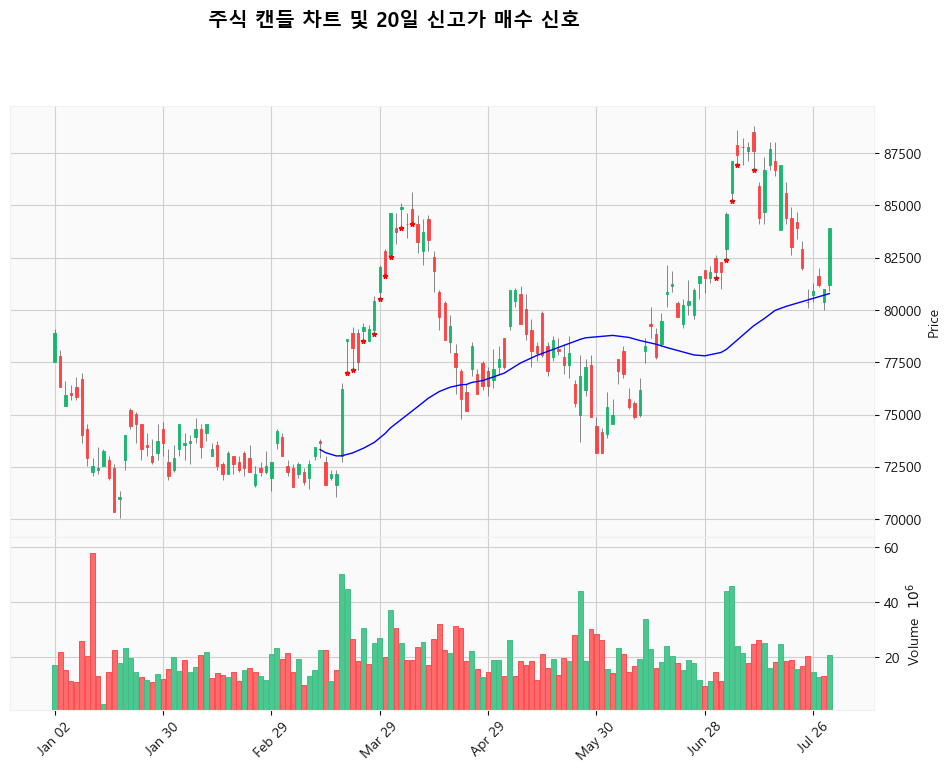

총 14 개의 매수 신호가 발생했습니다.
매수 신호 발생 날짜: 2024-03-21, 고가: 78590.73, 20일 이전 최고가: 78590.73
매수 신호 발생 날짜: 2024-03-22, 고가: 79185.37, 20일 이전 최고가: 79185.37
매수 신호 발생 날짜: 2024-03-26, 고가: 79383.58, 20일 이전 최고가: 79383.58
매수 신호 발생 날짜: 2024-03-28, 고가: 80640.33, 20일 이전 최고가: 80640.33
매수 신호 발생 날짜: 2024-03-29, 고가: 82133.67, 20일 이전 최고가: 82133.67
매수 신호 발생 날짜: 2024-04-01, 고가: 82930.12, 20일 이전 최고가: 82930.12
매수 신호 발생 날짜: 2024-04-02, 고가: 84622.57, 20일 이전 최고가: 84622.57
매수 신호 발생 날짜: 2024-04-04, 고가: 85120.35, 20일 이전 최고가: 85120.35
매수 신호 발생 날짜: 2024-04-08, 고가: 85618.13, 20일 이전 최고가: 85618.13
매수 신호 발생 날짜: 2024-07-02, 고가: 82600.00, 20일 이전 최고가: 82600.00
매수 신호 발생 날짜: 2024-07-04, 고가: 84700.00, 20일 이전 최고가: 84700.00
매수 신호 발생 날짜: 2024-07-05, 고가: 87100.00, 20일 이전 최고가: 87100.00
매수 신호 발생 날짜: 2024-07-08, 고가: 88600.00, 20일 이전 최고가: 88600.00
매수 신호 발생 날짜: 2024-07-11, 고가: 88800.00, 20일 이전 최고가: 88800.00


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 윈도우의 경우
# font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 리눅스의 경우
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

def get_stock_data(ticker, start_date, end_date):
    """
    야후 파이낸스에서 주식 데이터를 가져오는 함수
    """
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date)
    return df

def generate_buy_signals(df, window=20):
    """
    20일 신고가 돌파 시 매수 신호를 생성하는 함수
    :param df: 주식 데이터 DataFrame
    :param window: 신고가 판단 기준 기간 (기본값: 20일)
    :return: 매수 신호가 추가된 DataFrame
    """
    df['rolling_high'] = df['High'].rolling(window=window).max()
    df['buy_signal'] = (df['High'] > df['rolling_high'].shift(1)) & (df['High'] != df['rolling_high'].shift(1))
    return df

def plot_candlestick_chart(df):
    """
    캔들 차트를 그리고 매수 신호를 표시하는 함수
    :param df: 분석 결과가 포함된 DataFrame
    """
    df_plot = df.copy()
    df_plot.index.name = 'Date'
    
    # 매수 신호를 표시하기 위한 마커 생성
    buy_signals = df_plot[df_plot['buy_signal'] == True]
    
    # 모든 날짜에 대해 매수 신호 데이터 생성 (신호가 없는 날은 NaN)
    buy_signal_data = pd.Series(np.where(df_plot['buy_signal'], df_plot['Low'], np.nan), index=df_plot.index)
    
    # 20일 이동 평균선 추가
    ma20 = df_plot['Close'].rolling(window=50).mean()
    
    markers = [
        mpf.make_addplot(buy_signal_data, type='scatter', markersize=10, marker='*', color='r'),
        mpf.make_addplot(ma20, color='blue', width=1)
    ]

    # 캔들 차트 스타일 설정
    style = mpf.make_mpf_style(base_mpf_style='yahoo', rc={'font.family': font_name, 'figure.figsize': (12, 8)})

    # 캔들 차트 그리기
    mpf.plot(df_plot, type='candle', style=style, addplot=markers,
             title='주식 캔들 차트 및 20일 신고가 매수 신호',
             volume=True, 
             figscale=1.5)

# 메인 실행 코드
if __name__ == "__main__":
    ticker = "005930.KS"  # 삼성전자 주식 코드
    start_date = "2024-01-01"
    end_date = "2024-08-01"
    
    df = get_stock_data(ticker, start_date, end_date)
    df = generate_buy_signals(df,window=50)
    
    plot_candlestick_chart(df)
    
    # 매수 신호 정보 출력
    buy_signals = df[df['buy_signal'] == True]
    print(f"총 {len(buy_signals)} 개의 매수 신호가 발생했습니다.")
    for date, row in buy_signals.iterrows():
        print(f"매수 신호 발생 날짜: {date.date()}, 고가: {row['High']:.2f}, 20일 이전 최고가: {row['rolling_high']:.2f}")

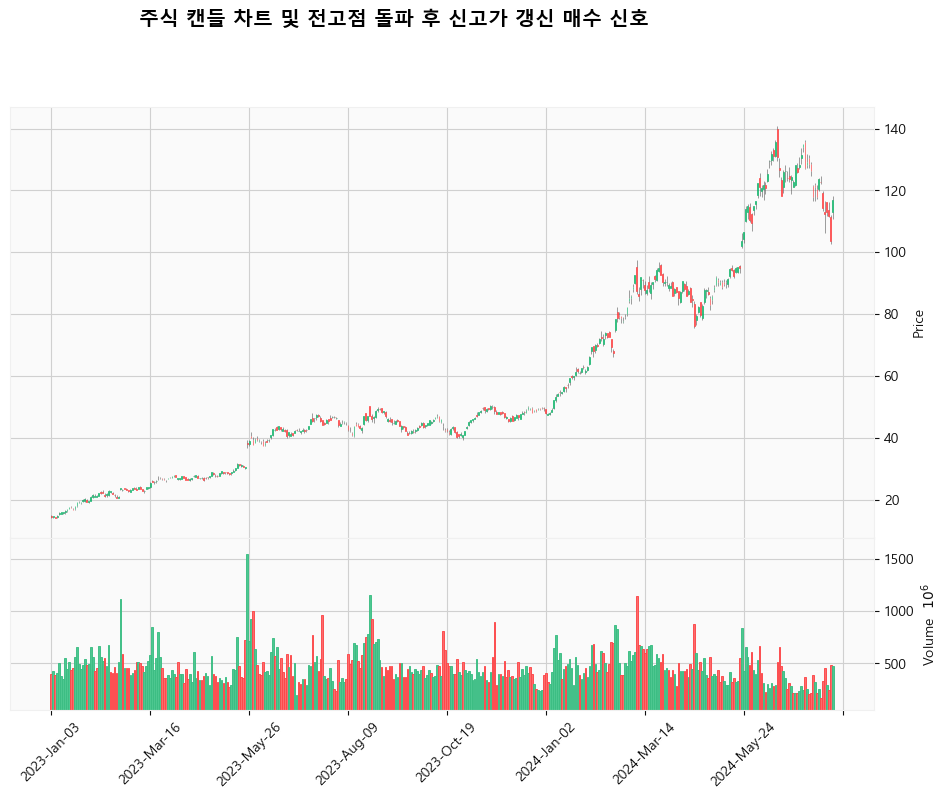

총 37 개의 매수 신호가 발생했습니다.
매수 신호 발생 날짜: 2024-01-08, 고가: 52.27, 이전 고점: 50.54
매수 신호 발생 날짜: 2024-01-09, 고가: 54.32, 이전 고점: 52.27
매수 신호 발생 날짜: 2024-01-10, 고가: 54.59, 이전 고점: 54.32
매수 신호 발생 날짜: 2024-01-11, 고가: 55.34, 이전 고점: 54.59
매수 신호 발생 날짜: 2024-01-16, 고가: 56.83, 이전 고점: 55.34
매수 신호 발생 날짜: 2024-01-18, 고가: 57.59, 이전 고점: 56.83
매수 신호 발생 날짜: 2024-01-19, 고가: 59.49, 이전 고점: 57.59
매수 신호 발생 날짜: 2024-01-22, 고가: 60.32, 이전 고점: 59.49
매수 신호 발생 날짜: 2024-01-24, 고가: 62.84, 이전 고점: 60.32
매수 신호 발생 날짜: 2024-01-30, 고가: 63.48, 이전 고점: 62.84
매수 신호 발생 날짜: 2024-02-02, 고가: 66.59, 이전 고점: 63.48
매수 신호 발생 날짜: 2024-02-05, 고가: 69.49, 이전 고점: 66.59
매수 신호 발생 날짜: 2024-02-06, 고가: 69.75, 이전 고점: 69.49
매수 신호 발생 날짜: 2024-02-07, 고가: 70.21, 이전 고점: 69.75
매수 신호 발생 날짜: 2024-02-08, 고가: 70.78, 이전 고점: 70.21
매수 신호 발생 날짜: 2024-02-09, 고가: 72.18, 이전 고점: 70.78
매수 신호 발생 날짜: 2024-02-12, 고가: 74.60, 이전 고점: 72.18
매수 신호 발생 날짜: 2024-02-22, 고가: 78.56, 이전 고점: 74.60
매수 신호 발생 날짜: 2024-02-23, 고가: 82.38, 이전 고점: 78.56
매수 신호 발생 날짜: 2024-03-04, 고가: 87.68, 이전 고점: 82.

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 윈도우의 경우
# font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 리눅스의 경우
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

def get_stock_data(ticker, start_date, end_date):
    """
    야후 파이낸스에서 주식 데이터를 가져오는 함수
    """
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date)
    return df

def generate_buy_signals(df, lookback_period=252):
    """
    전고점 돌파 후 신고가 갱신 시 매수 신호를 생성하는 함수
    :param df: 주식 데이터 DataFrame
    :param lookback_period: 전고점 판단 기준 기간 (기본값: 252일, 약 1년)
    :return: 매수 신호가 추가된 DataFrame
    """
    df['rolling_max'] = df['High'].rolling(window=lookback_period).max()
    df['prev_high'] = df['rolling_max'].shift(1)
    
    # 전고점 돌파 조건
    breakout_condition = (df['High'] > df['prev_high']) & (df['High'] != df['prev_high'])
    
    # 신고가 갱신 조건
    new_high_condition = df['High'] == df['rolling_max']
    
    # 매수 신호 생성
    df['buy_signal'] = breakout_condition & new_high_condition
    
    return df

def plot_candlestick_chart(df):
    """
    캔들 차트를 그리고 매수 신호를 표시하는 함수
    :param df: 분석 결과가 포함된 DataFrame
    """
    df_plot = df.copy()
    df_plot.index.name = 'Date'
    
    # 매수 신호를 표시하기 위한 마커 생성
    buy_signals = df_plot[df_plot['buy_signal'] == True]
    
    # 모든 날짜에 대해 매수 신호 데이터 생성 (신호가 없는 날은 NaN)
    buy_signal_data = pd.Series(np.where(df_plot['buy_signal'], df_plot['Low'], np.nan), index=df_plot.index)
       
    markers = [
        mpf.make_addplot(buy_signal_data, type='scatter', markersize=100, marker='*', color='r')
    ]

    # 캔들 차트 스타일 설정
    style = mpf.make_mpf_style(base_mpf_style='yahoo', rc={'font.family': font_name, 'figure.figsize': (12, 8)})

    # 캔들 차트 그리기
    mpf.plot(df_plot, type='candle', style=style, addplot=[],
             title='주식 캔들 차트 및 전고점 돌파 후 신고가 갱신 매수 신호',
             volume=True, 
             figscale=1.5)

# 메인 실행 코드
if __name__ == "__main__":
    ticker = "NVDA"  # 삼성전자 주식 코드
    start_date = "2023-01-01"
    end_date = "2024-08-01"
    
    df = get_stock_data(ticker, start_date, end_date)
    df = generate_buy_signals(df)
    
    plot_candlestick_chart(df)
    
    # 매수 신호 정보 출력
    buy_signals = df[df['buy_signal'] == True]
    print(f"총 {len(buy_signals)} 개의 매수 신호가 발생했습니다.")
    for date, row in buy_signals.iterrows():
        print(f"매수 신호 발생 날짜: {date.date()}, 고가: {row['High']:.2f}, 이전 고점: {row['prev_high']:.2f}")